# Title: Project ML:  Fraud Detection for Online Transactions

##### The project follow following steps 
1) Data Collection  
2) Data Cleaning and Preprocessing  
3) Visualize the Data  
4) Split the Data  
5) Label encoding  
6) Model Training  
7) Model Evaluation  
8) Optimize the Model  
9) Web Application Development  
10) Deployment and Group Presentation

## 1) Data Collection

https://www.kaggle.com/competitions/ieee-fraud-detection/data

## 2) Data Cleaning and Preprocessing

## Step 1: Load required libraries and data

In [1]:
# Import dependencies
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the data
file_path1 = Path("Resources/test_identity.csv")
file_path2 = Path("Resources/test_transaction.csv")
file_path3 = Path("Resources/train_identity.csv")
file_path4 = Path("Resources/train_transaction.csv")

In [3]:
# Read the data
test_identity = pd.read_csv(file_path1)
test_transaction = pd.read_csv(file_path2)
train_identity = pd.read_csv(file_path3)
train_transaction = pd.read_csv(file_path4)

### Note: 

**The dataset contains information about the identity and transactions made by the individuals in train and test set

# Step 2: Exploring the Data

In [4]:
# get shape of the data
print("test_identity Shape: ", test_identity.shape)
print("test_transaction Shape: ", test_transaction.shape)
print("train_identity Shape: ", train_identity.shape)
print("train_transaction Shape: ", train_transaction.shape)

test_identity Shape:  (141907, 41)
test_transaction Shape:  (506691, 393)
train_identity Shape:  (144233, 41)
train_transaction Shape:  (590540, 394)


In [5]:
# print first five rows of each dataset
print(test_identity.head())
print(test_transaction.head())
print(train_identity.head())
print(train_transaction.head(2))


   TransactionID  id-01     id-02  id-03  id-04  id-05  id-06  id-07  id-08  \
0        3663586  -45.0  280290.0    NaN    NaN    0.0    0.0    NaN    NaN   
1        3663588    0.0    3579.0    0.0    0.0    0.0    0.0    NaN    NaN   
2        3663597   -5.0  185210.0    NaN    NaN    1.0    0.0    NaN    NaN   
3        3663601  -45.0  252944.0    0.0    0.0    0.0    0.0    NaN    NaN   
4        3663602  -95.0  328680.0    NaN    NaN    7.0  -33.0    NaN    NaN   

   id-09  ...                    id-31  id-32     id-33           id-34  \
0    NaN  ...  chrome 67.0 for android    NaN       NaN             NaN   
1    0.0  ...  chrome 67.0 for android   24.0  1280x720  match_status:2   
2    NaN  ...       ie 11.0 for tablet    NaN       NaN             NaN   
3    0.0  ...  chrome 67.0 for android    NaN       NaN             NaN   
4    NaN  ...  chrome 67.0 for android    NaN       NaN             NaN   

   id-35 id-36 id-37  id-38  DeviceType                   DeviceInfo  
0  

In [6]:
# get information about the data
print(test_identity.info())
print(test_transaction.info())
print(train_identity.info())
print(train_transaction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141907 entries, 0 to 141906
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  141907 non-null  int64  
 1   id-01          141907 non-null  float64
 2   id-02          136976 non-null  float64
 3   id-03          66481 non-null   float64
 4   id-04          66481 non-null   float64
 5   id-05          134750 non-null  float64
 6   id-06          134750 non-null  float64
 7   id-07          5059 non-null    float64
 8   id-08          5059 non-null    float64
 9   id-09          74338 non-null   float64
 10  id-10          74338 non-null   float64
 11  id-11          136778 non-null  float64
 12  id-12          141907 non-null  object 
 13  id-13          130286 non-null  float64
 14  id-14          71357 non-null   float64
 15  id-15          136977 non-null  object 
 16  id-16          125747 non-null  object 
 17  id-17          135966 non-nul

### Note:  

**The train and test datasets have a column `TransactionID`, which can be used as the unique identifier for each transaction.

**The transaction files contain information such as transaction amount, time, and card information, while the identity files contain information such as device type, device info, and several ID columns.**

**The train dataset has a target column called `isFraud`.**

In [7]:
# get descriptive statistics for each dataset
print(test_identity.describe())
print(test_transaction.describe())
print(train_identity.describe())
print(train_transaction.describe())

       TransactionID          id-01          id-02         id-03  \
count   1.419070e+05  141907.000000  136976.000000  66481.000000   
mean    3.972166e+06     -11.325734  192658.729909      0.053008   
std     1.469966e+05      14.508520  182613.277215      0.684551   
min     3.663586e+06    -100.000000       2.000000    -12.000000   
25%     3.859268e+06     -12.500000   63339.500000      0.000000   
50%     4.001774e+06      -5.000000  133189.500000      0.000000   
75%     4.105284e+06      -5.000000  265717.500000      0.000000   
max     4.170239e+06       0.000000  999869.000000     11.000000   

              id-04          id-05          id-06        id-07        id-08  \
count  66481.000000  134750.000000  134750.000000  5059.000000  5059.000000   
mean      -0.087454       1.246033      -6.803829    12.493180   -36.577782   
std        0.840351       5.071394      15.921457    11.678206    25.544185   
min      -19.000000     -81.000000    -100.000000   -41.000000  -100.00

       TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000    

## Step 3:  Duplicate  Values:

In [8]:
# Check for Duplicate Values:
test_identity.duplicated().sum()
test_transaction.duplicated().sum()
train_identity.duplicated().sum()
train_transaction.duplicated().sum()

0

## Step 4:Merge data

In [9]:
# Merge identity and transaction datasets
train = train_transaction.merge(train_identity, on="TransactionID", how="left")
test = test_transaction.merge(test_identity, on="TransactionID", how="left")


In [10]:
# Check the shape of the merged data
print("train_data Shape: ", train.shape)
print("test_data Shape: ", test.shape)

train_data Shape:  (590540, 434)
test_data Shape:  (506691, 433)


In [11]:
# Check for missing values in train and test data
missing_train = train.isnull().sum().sort_values(ascending=False)
missing_test = test.isnull().sum().sort_values(ascending=False)

In [12]:
# Display the percentage of missing values in each column
print("Missing values in train (%):")
print((missing_train / len(train)) * 100)
print("\nMissing values in test_data (%):")
print((missing_test / len(test)) * 100)

Missing values in train (%):
id_24            99.196159
id_25            99.130965
id_07            99.127070
id_08            99.127070
id_21            99.126393
                   ...    
C11               0.000000
C12               0.000000
C13               0.000000
C14               0.000000
TransactionID     0.000000
Length: 434, dtype: float64

Missing values in test_data (%):
id-24            99.064519
id-25            99.005508
id-26            99.003929
id-07            99.001561
id-08            99.001561
                   ...    
V111              0.000000
V112              0.000000
V113              0.000000
V114              0.000000
TransactionID     0.000000
Length: 433, dtype: float64


### Note:
**drop columns with a missing value percentage greater than a certain threshold (let's say 50%)

### Step 5: Handle Missing Values

In [13]:
# Drop columns with more than 50% missing values
train_data = train.drop(columns=missing_train[missing_train > 0.5 * len(train)].index)
test_data = test.drop(columns=missing_test[missing_test > 0.5 * len(test)].index)

In [14]:
# Impute missing values in the remaining columns with their respective means
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

### Step 6:Save cleaned data to new CSV files

In [17]:
# Save cleaned data to new CSV files
train_data.to_csv("Resources/clean_train_data.csv", index=False)
test_data.to_csv("Resources/clean_test_data.csv", index=False)

### Step 7:check data types

In [18]:
# check data types for train data
print(train_data.dtypes)

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V317              float64
V318              float64
V319              float64
V320              float64
V321              float64
Length: 220, dtype: object


In [19]:
# check data types for test data
print(test_data.dtypes)

TransactionID       int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
                   ...   
V317              float64
V318              float64
V319              float64
V320              float64
V321              float64
Length: 223, dtype: object


## 3) Visualize the Data relationship between  features

 ### Note:
**visualize the distribution of the target variable, isFraud, in the train_transaction dataset.

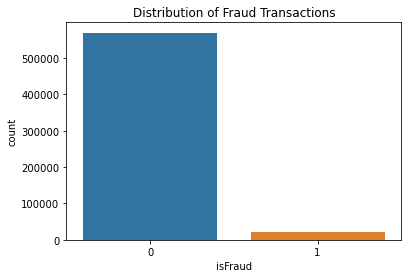

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Distribution of the target variable 'isFraud'
sns.countplot(x='isFraud', data=train_transaction)
plt.title('Distribution of Fraud Transactions')
plt.show()

### Note:
**visualize the distribution of the TransactionAmt variable for both fraud and non-fraud transactions:

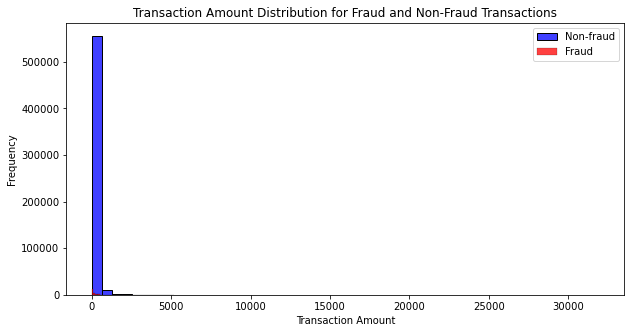

In [21]:
# Distribution of transaction amounts for fraud and non-fraud transactions
plt.figure(figsize=(10, 5))
sns.histplot(train_transaction[train_transaction['isFraud'] == 0]['TransactionAmt'], kde=False, bins=50, color='blue', label='Non-fraud')
sns.histplot(train_transaction[train_transaction['isFraud'] == 1]['TransactionAmt'], kde=False, bins=50, color='red', label='Fraud')
plt.legend()
plt.title('Transaction Amount Distribution for Fraud and Non-Fraud Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

### Note:
**heatmap to visualize the correlation between some of the numerical features in the train_transaction dataset:

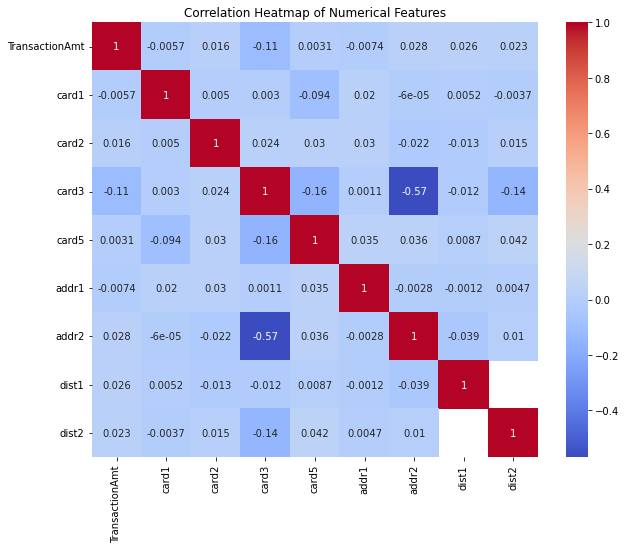

In [22]:
# Select a subset of numerical features for the correlation heatmap
numerical_features = ['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2']

# Calculate the correlation matrix
corr_matrix = train_transaction[numerical_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 4) Split the Data  

In [23]:
# Load cleaned data
clean_train_data = pd.read_csv("Resources/clean_train_data.csv")
clean_test_data = pd.read_csv("Resources/clean_test_data.csv")


In [24]:
# Separate features and target in the train data
X = clean_train_data.drop(columns=['isFraud', 'TransactionID'])
y = clean_train_data['isFraud']


## 5) Label encoding 

##  6) Model Training  by using RandomForestClassifier

## 7) Model Evaluation

## 8)   Model Optimization

## 9) Final Model Evaluation